<a href="https://colab.research.google.com/github/PratyushKattel/DL_and_ML/blob/main/ts_learningipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import keras
from keras.applications.vgg16 import VGG16
from keras.layers import Dense,Flatten
from keras import Sequential

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download eneskosar19/happy-or-sad-binary-image-classification

Dataset URL: https://www.kaggle.com/datasets/eneskosar19/happy-or-sad-binary-image-classification
License(s): other
  0% 0.00/28.7M [00:00<?, ?B/s]
100% 28.7M/28.7M [00:00<00:00, 984MB/s]


In [ ]:
!unzip happy-or-sad-binary-image-classification.zip

Archive:  happy-or-sad-binary-image-classification.zip
  inflating: face_classification/happy_person_face/-human-emotions-children-concept-beautiful-excited-optimistic-blue-236590722.jpg  
  inflating: face_classification/happy_person_face/1000_F_185048528_i9zX0FC3Q8iDNb2E5hanWzN0KeJSXSy6.jpg  
  inflating: face_classification/happy_person_face/1000_F_206825373_PfhE4TyHbpUXggBKdTLZYn0HcuRCP9rf.jpg  
  inflating: face_classification/happy_person_face/1000_F_246149544_RZIU2J7fQKl9JVWZBeSvJHUCRtdjTqAl.jpg  
  inflating: face_classification/happy_person_face/1000_F_254262588_wbdwGWgnETRzXZo49JBRLfkjnUybShBE.jpg  
  inflating: face_classification/happy_person_face/1000_F_254492492_Wx1D8iuzMTQrLWsGuV3CczX2teZau4XG.jpg  
  inflating: face_classification/happy_person_face/1000_F_267995900_qg8jfTCHvCijDkXC5HOlPBK0pZ0i0dlh.jpg  
  inflating: face_classification/happy_person_face/1000_F_303704831_0lfmbfqH4z2wfPDUQZxMsRyA6Rw2Al61.jpg  
  inflating: face_classification/happy_person_face/114303686-h

In [ ]:
from keras.utils import load_img,img_to_array
x=load_img('/content/face_classification/happy_person_face/-human-emotions-children-concept-beautiful-excited-optimistic-blue-236590722.jpg',target_size=(150,150))

In [ ]:
img_to_array(x).shape

(150, 150, 3)

In [ ]:
convolutional_vgg=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
convolutional_vgg.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
convolutional_vgg.trainable=False

for layers in convolutional_vgg.layers:
  if 'block5_conv' in layers.name:
    layers.trainable=True
  #freezing the training for all the layers except the last convolutional layer and the (pooling layer)
for layers in convolutional_vgg.layers:
  print(layers.name,": ",layers.trainable)

input_layer :  False
block1_conv1 :  False
block1_conv2 :  False
block1_pool :  False
block2_conv1 :  False
block2_conv2 :  False
block2_pool :  False
block3_conv1 :  False
block3_conv2 :  False
block3_conv3 :  False
block3_pool :  False
block4_conv1 :  False
block4_conv2 :  False
block4_conv3 :  False
block4_pool :  False
block5_conv1 :  True
block5_conv2 :  True
block5_conv3 :  True
block5_pool :  False


In [ ]:
model=Sequential()
model.add(convolutional_vgg)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
from keras.utils import image_dataset_from_directory

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(
    rescale=1./225,
    shear_range=0.3,
    zoom_range=1.3,
    horizontal_flip=True,
    rotation_range=30
)


train_generator=train_datagen.flow_from_directory(
    '/content/face_classification',
    target_size=(150,150),
    batch_size=16,
    class_mode='binary')


Found 164 images belonging to 2 classes.


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,763,521 (60.13 MB)

 Trainable params: 8,128,257 (31.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [ ]:
model.compile(optimizer='adam'
,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
len(train_generator)

21

In [ ]:
model.fit(
    train_generator,
    epochs=20,
    batch_size=10,
    steps_per_epoch=7
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.5642 - loss: 0.9815
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5061 - loss: 0.9513
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7226 - loss: 0.6475
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - accuracy: 0.5462 - loss: 0.6914
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5671 - loss: 0.6897
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5690 - loss: 0.6887
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - accuracy: 0.5840 - loss: 0.6869
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6299 - loss: 0.6879
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.4028 - loss: 0.7783
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.5689 - loss: 0.6748
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.6301 - loss: 0.6715
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.5483 - loss: 0.6425
Epoch 13/20
7

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,020,037 (122.15 MB)

 Trainable params: 8,128,257 (31.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

 Optimizer params: 16,256,516 (62.01 MB)

In [ ]:
happy_img=load_img('/content/happy_test.jpg',target_size=(150,150))

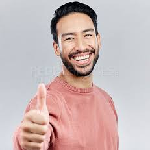

In [ ]:
happy_img

In [ ]:
train_generator.class_indices

{'happy_person_face': 0, 'sad_person_face': 1}

In [ ]:
pred=0 if model.predict(img_to_array(happy_img).reshape(1,150,150,3))<0.5 else 1


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


In [ ]:
print(f"the predicted value is {'happy' if pred ==0 else 'sad'}")

the predicted value is happy


In [ ]:
sad_img=load_img('/content/sad_test.jpg',target_size=(150,150))

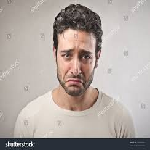

In [ ]:
sad_img


In [ ]:
pred_1=0 if model.predict(img_to_array(sad_img).reshape(1,150,150,3))<0.5 else 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step


In [ ]:
print(f"the predicted value is {'happy' if pred ==0 else 'sad'}")

the predicted value is happy


In [ ]:
vgg=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

In [ ]:
vgg.trainable=False

In [ ]:
model2=Sequential()
model2.add(vgg)
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [ ]:
model2.compile(optimizer='Adam',metrics=['accuracy'],loss='binary_crossentropy')

In [ ]:
history=model2.fit(
    train_generator,
    epochs=20,
    verbose=1,
    steps_per_epoch=11
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 47s 4s/step - accuracy: 0.6242 - loss: 0.6297
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.6353 - loss: 0.6478
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.5995 - loss: 0.6249
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.6840 - loss: 0.6033
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.6303 - loss: 0.6015
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.6941 - loss: 0.5719
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.6544 - loss: 0.6164
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.7175 - loss: 0.5835
Epoch 9/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.6894 - loss: 0.5601
Epoch 10/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 45s 4s/step - accuracy: 0.6603 - loss: 0.5778
Epoch 11/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.7203 - loss: 0.5376
Epoch 12/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 46s 4s/step - accuracy: 0.7178 - lo